## Проверяем подключение GPU

In [1]:
!nvidia-smi

Tue May  7 16:05:26 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Устанавливаем и подключаем библиотеку ultralytics

In [2]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.8/78.2 GB disk)


## Импортируем модуль YOLO

In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

## Подгружаем свои файлы из Google Drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Разархивируем папки из Roboflow Universe

In [6]:
!unzip '/content/drive/MyDrive/Colab Notebooks/logo detection.v3i.yolov8.zip' -d '/content/drive/MyDrive/Colab Notebooks'

Archive:  /content/drive/MyDrive/Colab Notebooks/logo detection.v3i.yolov8.zip
 extracting: /content/drive/MyDrive/Colab Notebooks/README.dataset.txt  
 extracting: /content/drive/MyDrive/Colab Notebooks/README.roboflow.txt  
 extracting: /content/drive/MyDrive/Colab Notebooks/data.yaml  
   creating: /content/drive/MyDrive/Colab Notebooks/test/
   creating: /content/drive/MyDrive/Colab Notebooks/test/images/
 extracting: /content/drive/MyDrive/Colab Notebooks/test/images/cat2_18752_jpg.rf.0a4e13bc6765c4ae213eee85909a90b8.jpg  
 extracting: /content/drive/MyDrive/Colab Notebooks/test/images/cat2_2164_jpg.rf.8499381b05791bb8f22e0e55d014150e.jpg  
 extracting: /content/drive/MyDrive/Colab Notebooks/test/images/cat2_24974_jpg.rf.81d8c01fb5ebd514d7f3b6335553dd5c.jpg  
 extracting: /content/drive/MyDrive/Colab Notebooks/test/images/cat2_27755_jpg.rf.84cbf41bce97eb7400e51d328f9a3e7b.jpg  
 extracting: /content/drive/MyDrive/Colab Notebooks/test/images/cat2_33162_jpg.rf.a0f4875584ad413367bcc3

## Обучаем модель на тренировочной выборке

In [23]:
%%time
!yolo task=detect mode=train model=yolov8x.pt data='/content/drive/MyDrive/Colab Notebooks/data.yaml' epochs=100 imgsz=640 plots=True

Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/drive/MyDrive/Colab Notebooks/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tru

In [24]:
import os

HOME = os.getcwd()
print(HOME)

/content


## Содержимое папки с результатами обучения

In [31]:
!ls {HOME}/runs/detect/train2/

args.yaml					     P_curve.png	  train_batch1711.jpg
confusion_matrix_normalized.png			     PR_curve.png	  train_batch1712.jpg
confusion_matrix.png				     R_curve.png	  train_batch1.jpg
events.out.tfevents.1715100581.08a503bca0d4.11934.0  results.csv	  train_batch2.jpg
F1_curve.png					     results.png	  val_batch0_labels.jpg
labels_correlogram.jpg				     train_batch0.jpg	  val_batch0_pred.jpg
labels.jpg					     train_batch1710.jpg  weights


## Графики результатов обучения

/content


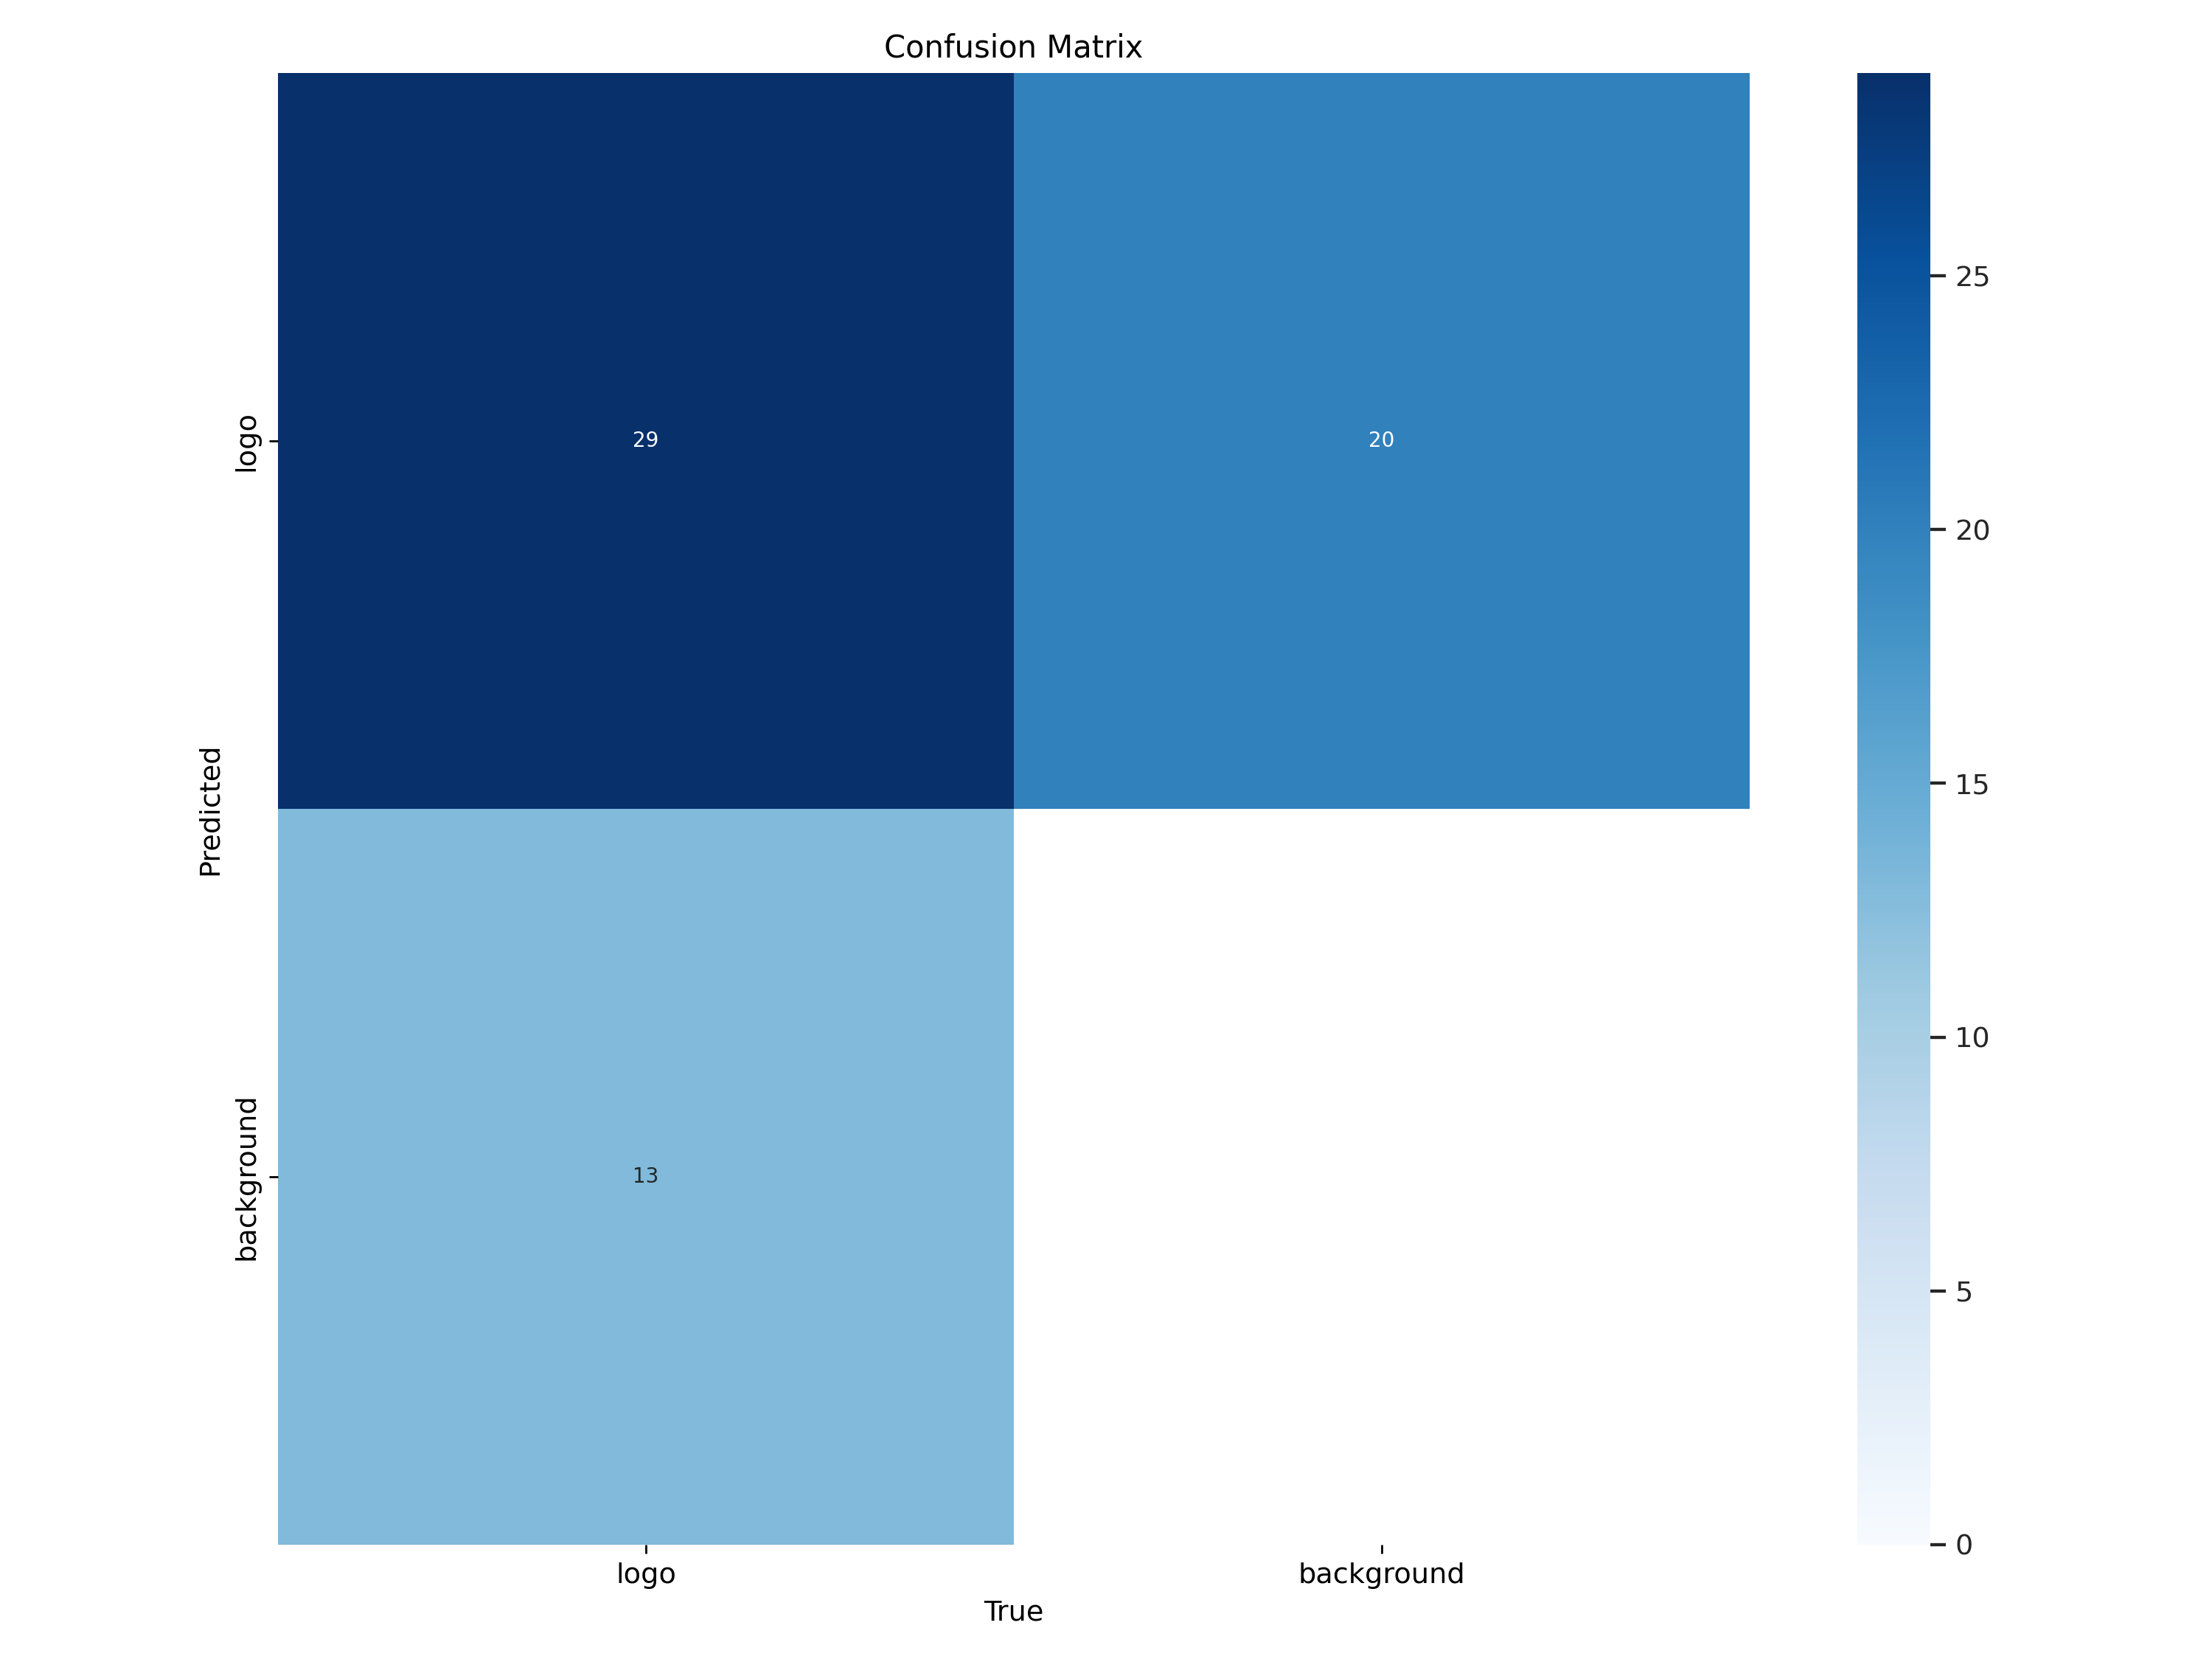

In [32]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


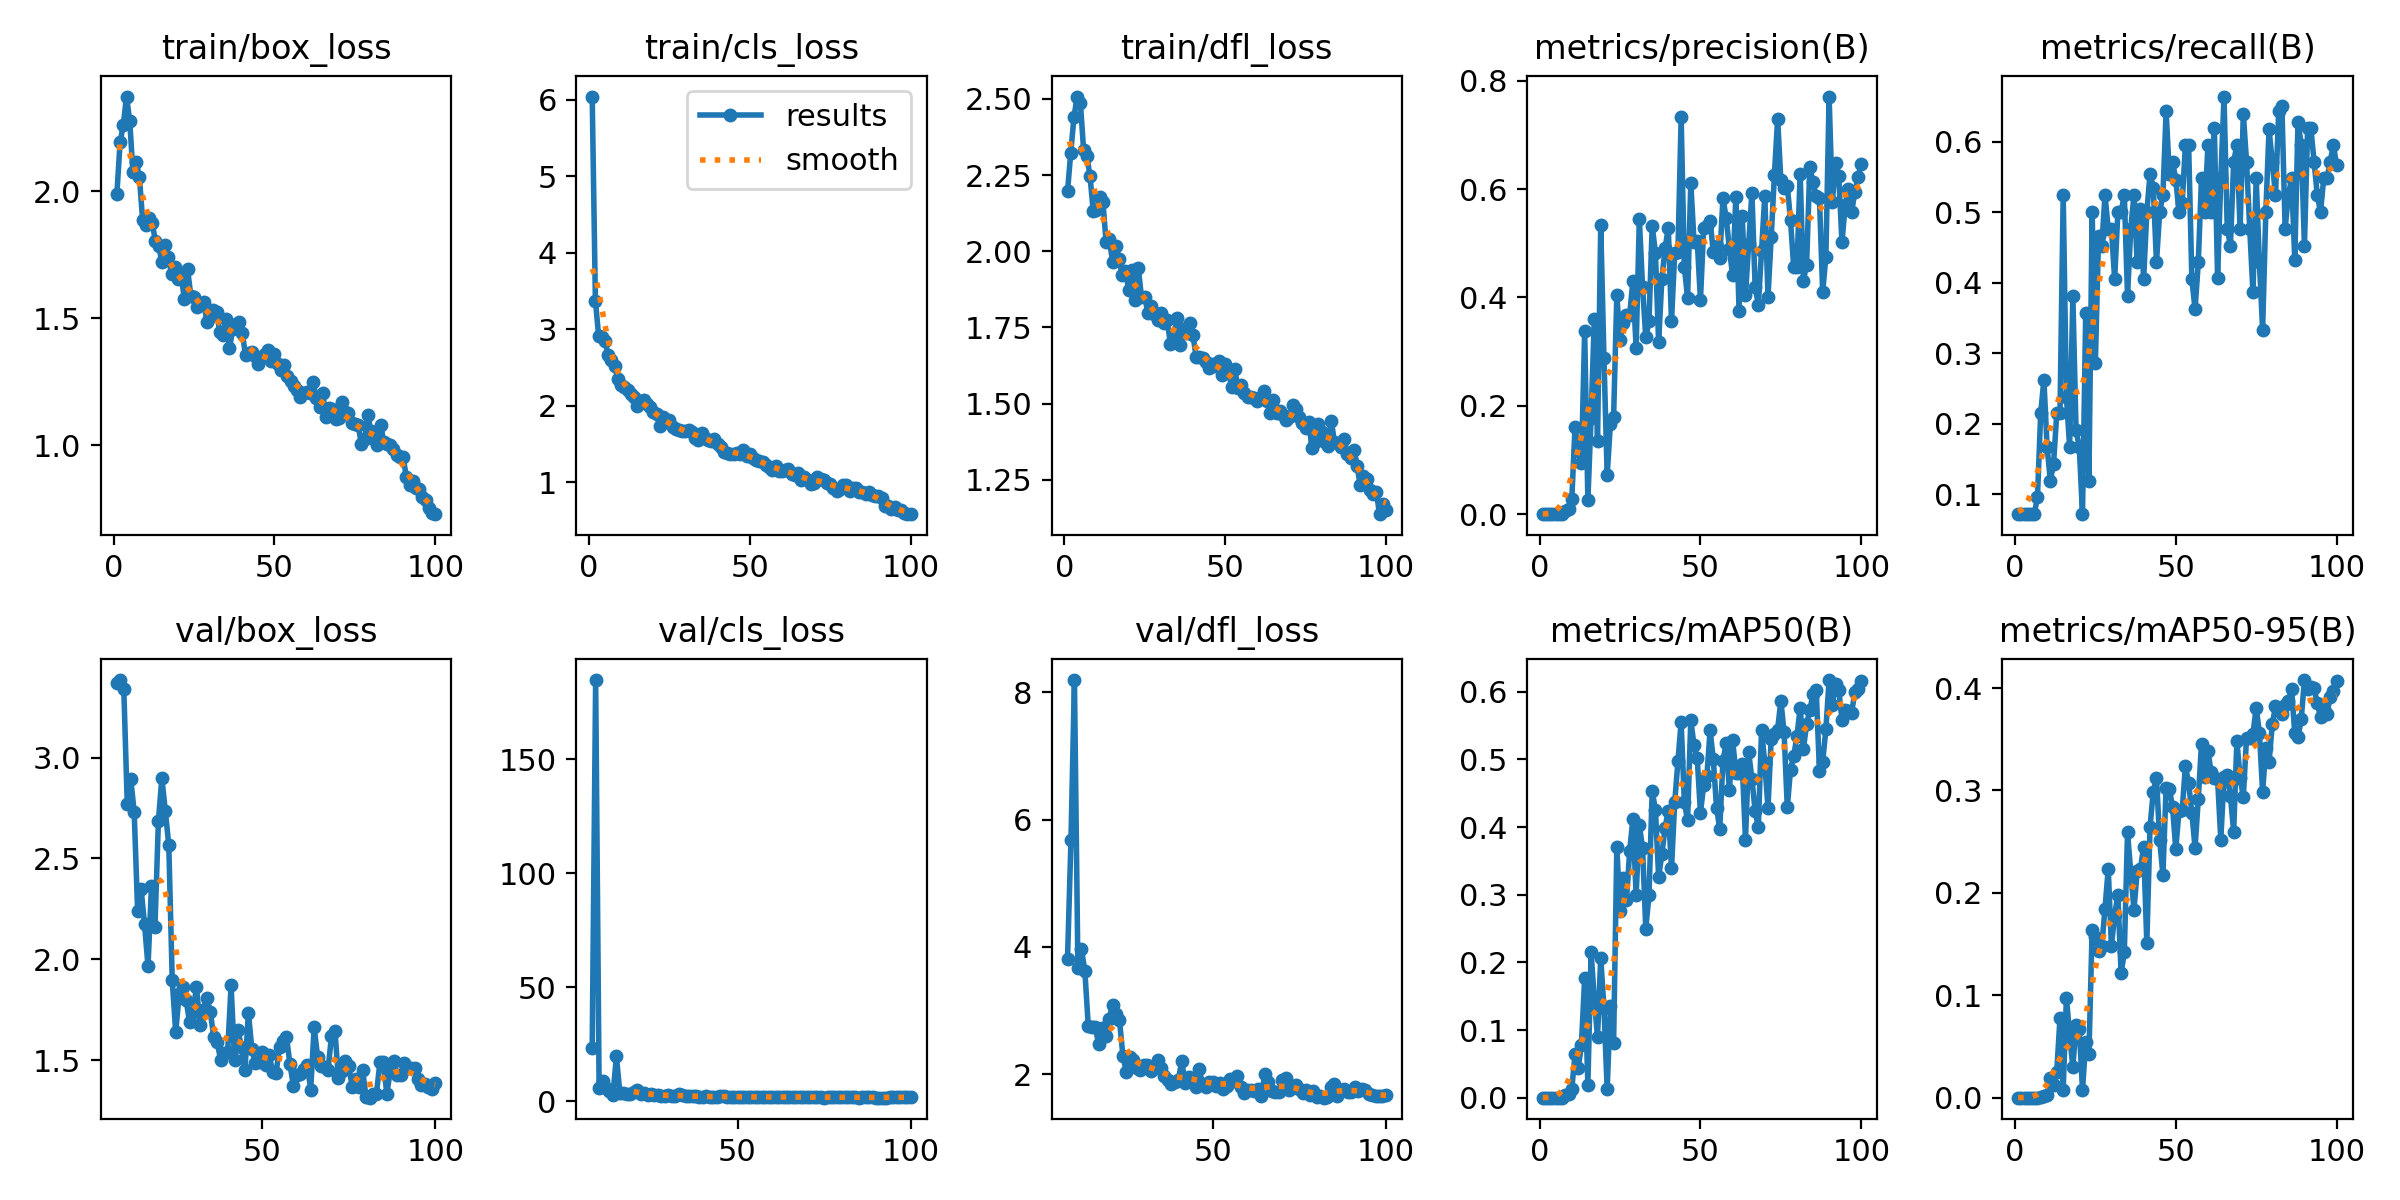

In [33]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=1000)

## На графиках видно, что с каждой эпохой потери на тренировочной и валидационной метрике падали. Точность (precision) и полнота (recall) росли, причем в тренировочной выборке менее гладко чем в валидационной.

/content


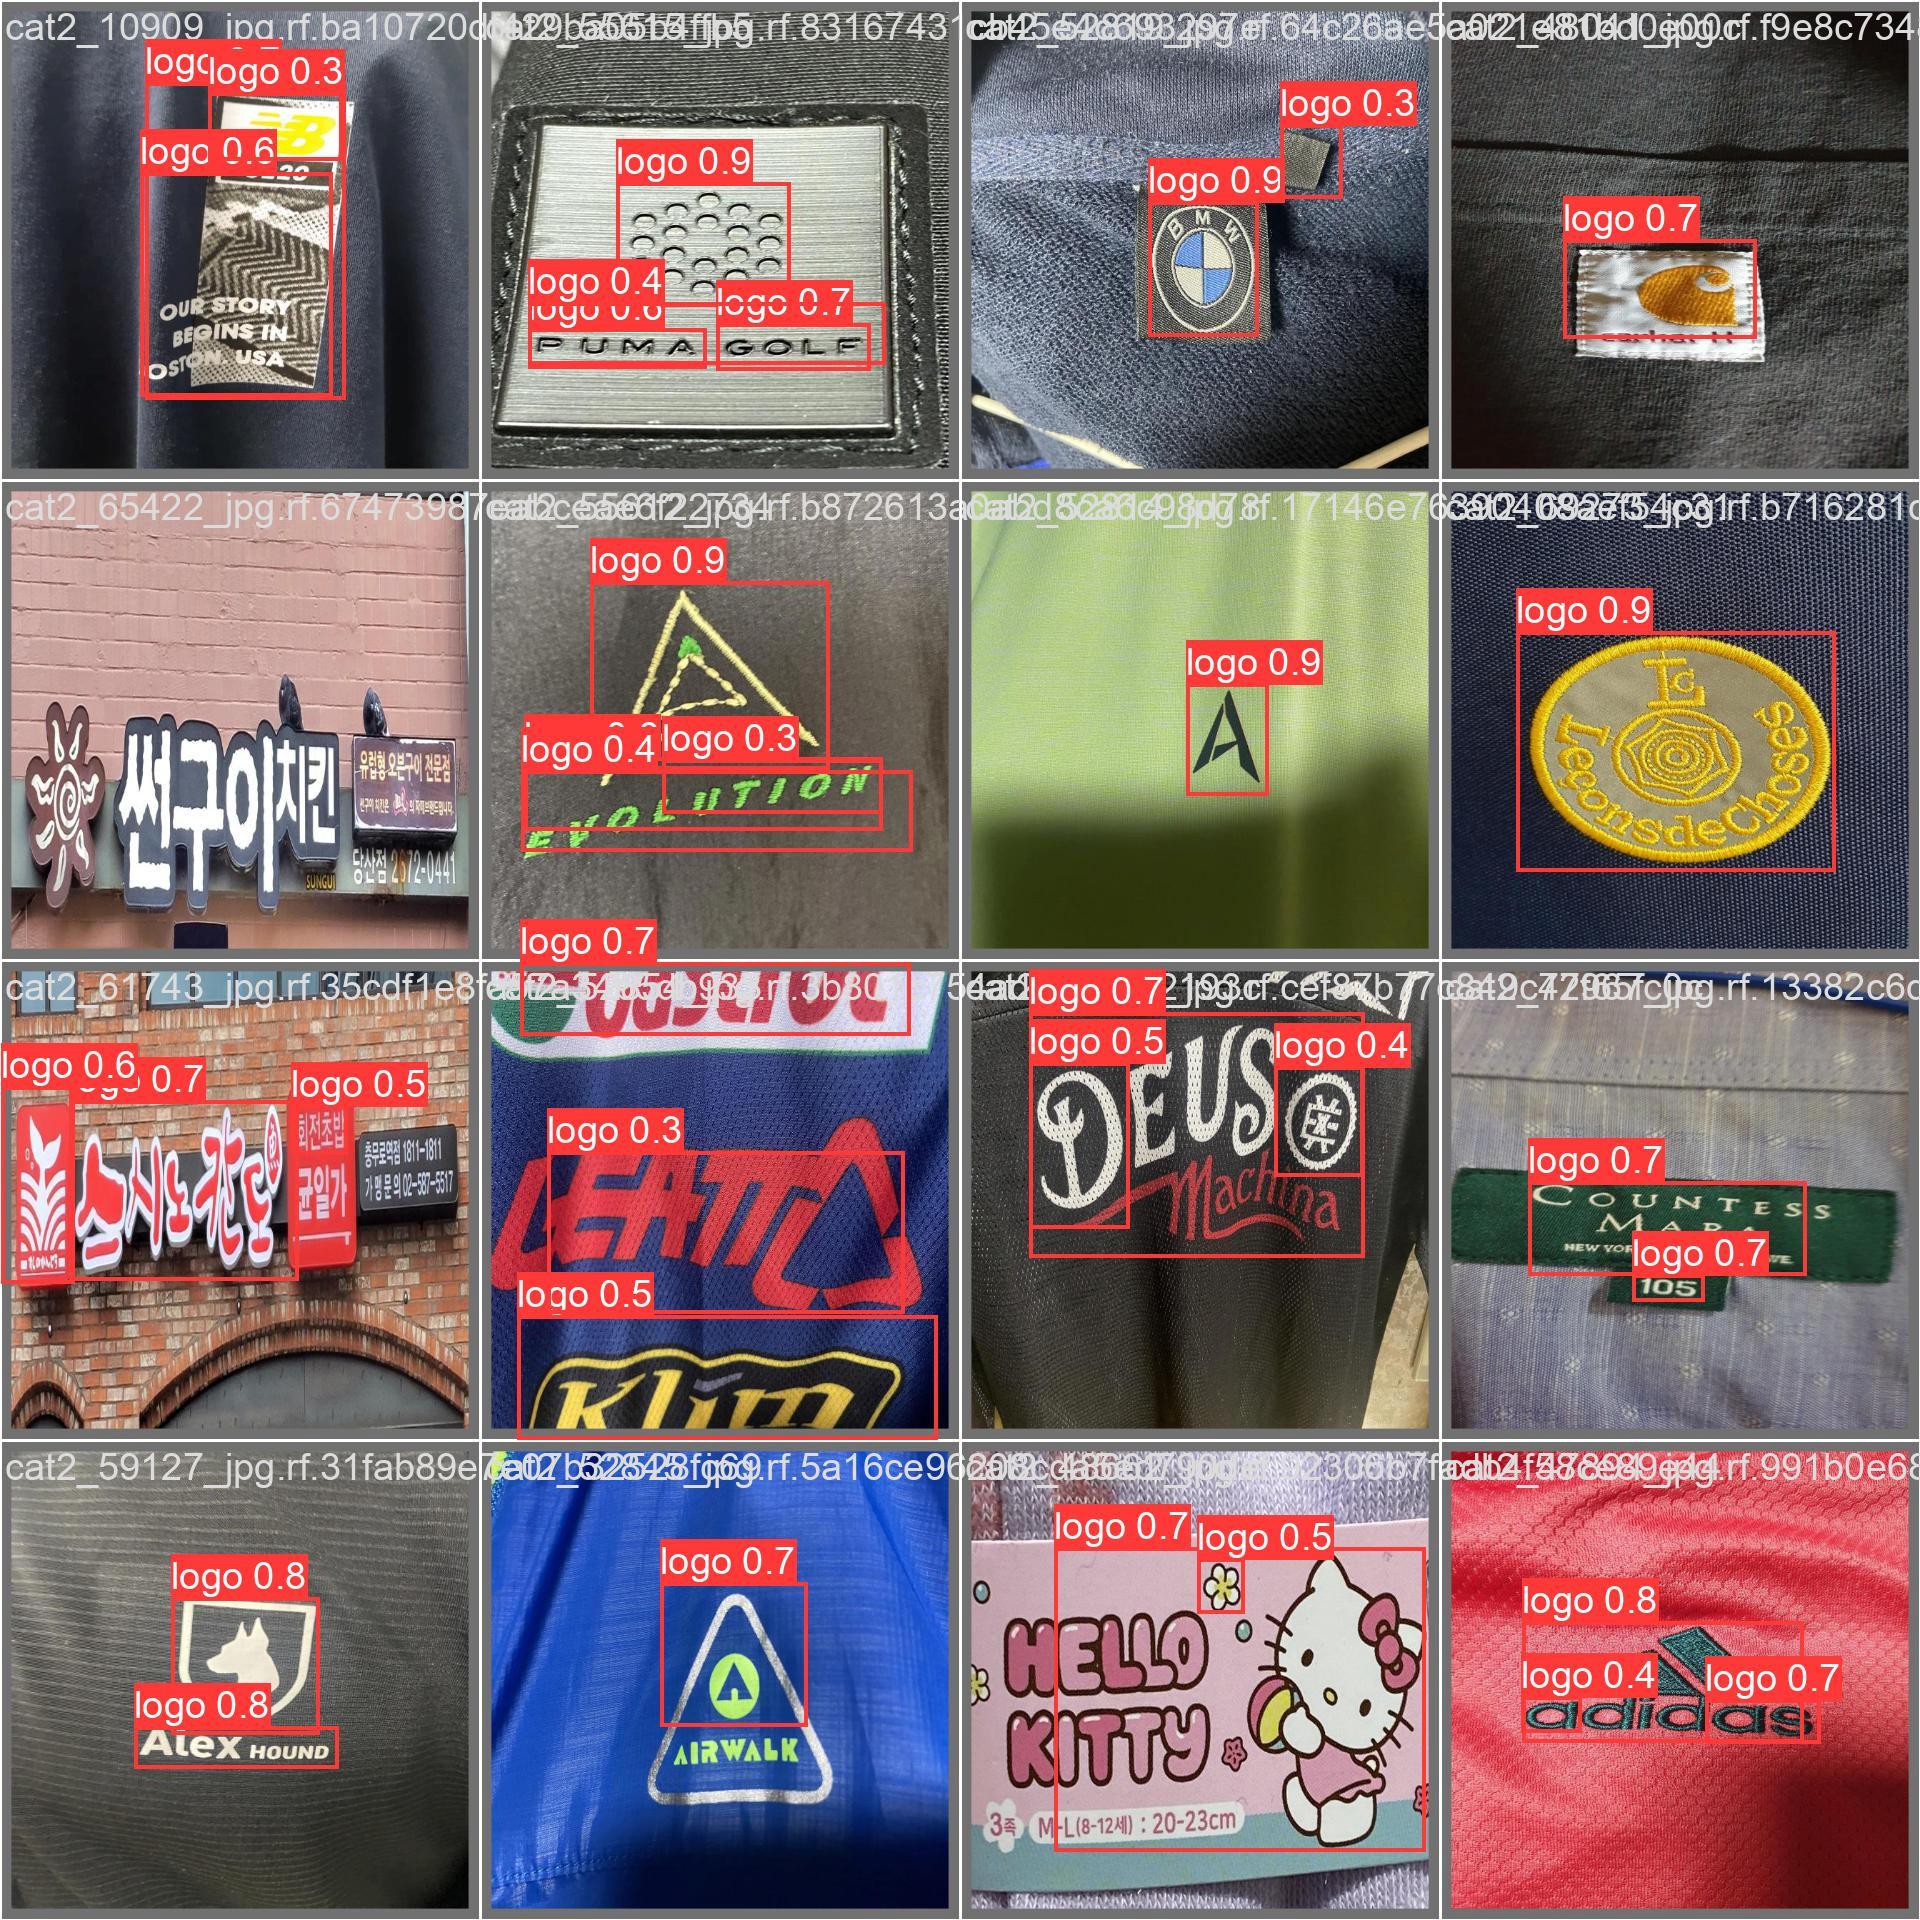

In [34]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=1000)

## Проверяем модель на валидационной выборке

In [35]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data='/content/drive/MyDrive/Colab Notebooks/data.yaml'

/content
Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /content/drive/MyDrive/Colab Notebooks/valid/labels.cache... 29 images, 0 backgrounds, 0 corrupt: 100% 29/29 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:06<00:00,  3.08s/it]
                   all         29         42      0.771      0.452      0.615      0.409
Speed: 0.3ms preprocess, 66.7ms inference, 0.0ms loss, 81.2ms postprocess per image
Results saved to runs/detect/val3
💡 Learn more at https://docs.ultralytics.com/modes/val


## Тестируем модель на данных тестовой выборки датасета c Roboflow Universe

In [51]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='/content/drive/MyDrive/Colab Notebooks/test/images' save=True

/content
Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs

image 1/21 /content/drive/MyDrive/Colab Notebooks/test/images/cat2_18752_jpg.rf.0a4e13bc6765c4ae213eee85909a90b8.jpg: 640x640 2 logos, 80.9ms
image 2/21 /content/drive/MyDrive/Colab Notebooks/test/images/cat2_2164_jpg.rf.8499381b05791bb8f22e0e55d014150e.jpg: 640x640 4 logos, 96.6ms
image 3/21 /content/drive/MyDrive/Colab Notebooks/test/images/cat2_24974_jpg.rf.81d8c01fb5ebd514d7f3b6335553dd5c.jpg: 640x640 (no detections), 76.0ms
image 4/21 /content/drive/MyDrive/Colab Notebooks/test/images/cat2_27755_jpg.rf.84cbf41bce97eb7400e51d328f9a3e7b.jpg: 640x640 1 logo, 71.2ms
image 5/21 /content/drive/MyDrive/Colab Notebooks/test/images/cat2_33162_jpg.rf.a0f4875584ad413367bcc3696895ef13.jpg: 640x640 2 logos, 58.8ms
image 6/21 /content/drive/MyDrive/Colab Notebooks/test/images/cat2_38900_jpg.rf.a3887dc210f81b258ac8441fc

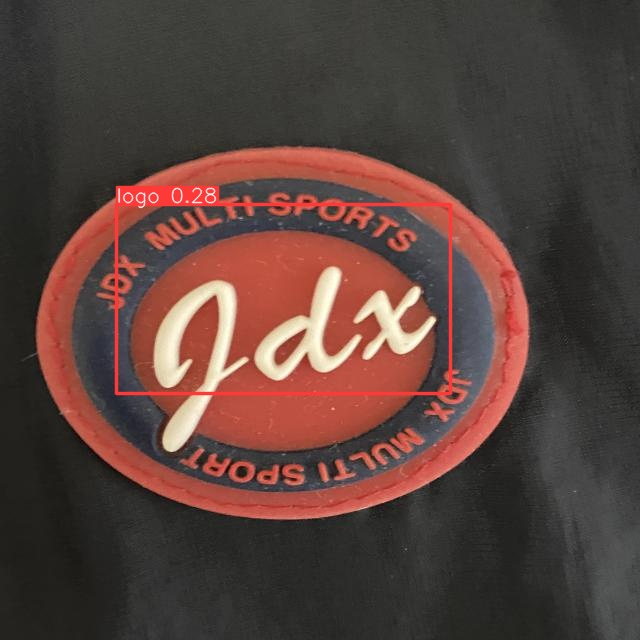

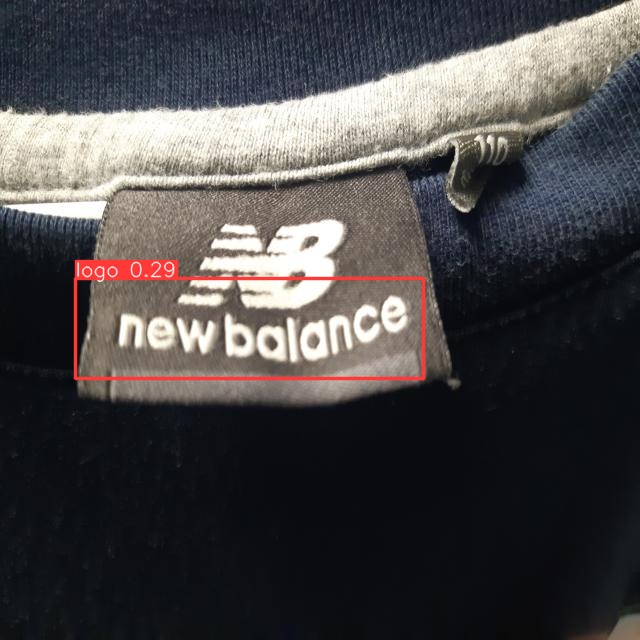

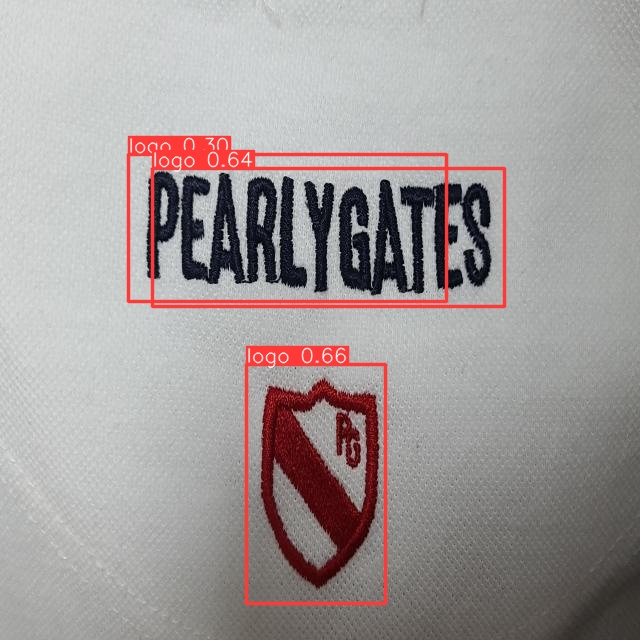

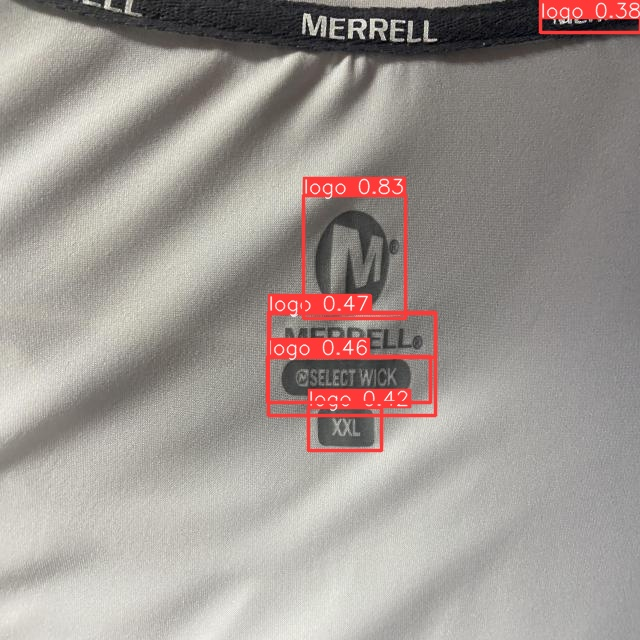

In [53]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict7/*.jpg')[:4]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Тестируем обученную модель на 7 изображениях тестового задания APRO

In [63]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.45 source='/content/drive/MyDrive/Colab Notebooks/source' save=True

/content
Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs

image 1/7 /content/drive/MyDrive/Colab Notebooks/source/1.jpg: 640x480 (no detections), 102.6ms
image 2/7 /content/drive/MyDrive/Colab Notebooks/source/2.jpg: 640x480 (no detections), 51.2ms
image 3/7 /content/drive/MyDrive/Colab Notebooks/source/3.jpg: 640x480 1 logo, 51.0ms
image 4/7 /content/drive/MyDrive/Colab Notebooks/source/4.jpg: 640x512 1 logo, 78.2ms
image 5/7 /content/drive/MyDrive/Colab Notebooks/source/5.jpg: 640x512 (no detections), 67.8ms
image 6/7 /content/drive/MyDrive/Colab Notebooks/source/6.jpg: 640x480 1 logo, 51.2ms
image 7/7 /content/drive/MyDrive/Colab Notebooks/source/7.jpg: 640x480 2 logos, 50.3ms
Speed: 2.4ms preprocess, 64.6ms inference, 287.5ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict12
💡 Learn more at https://docs.ultralytics.com/modes/p

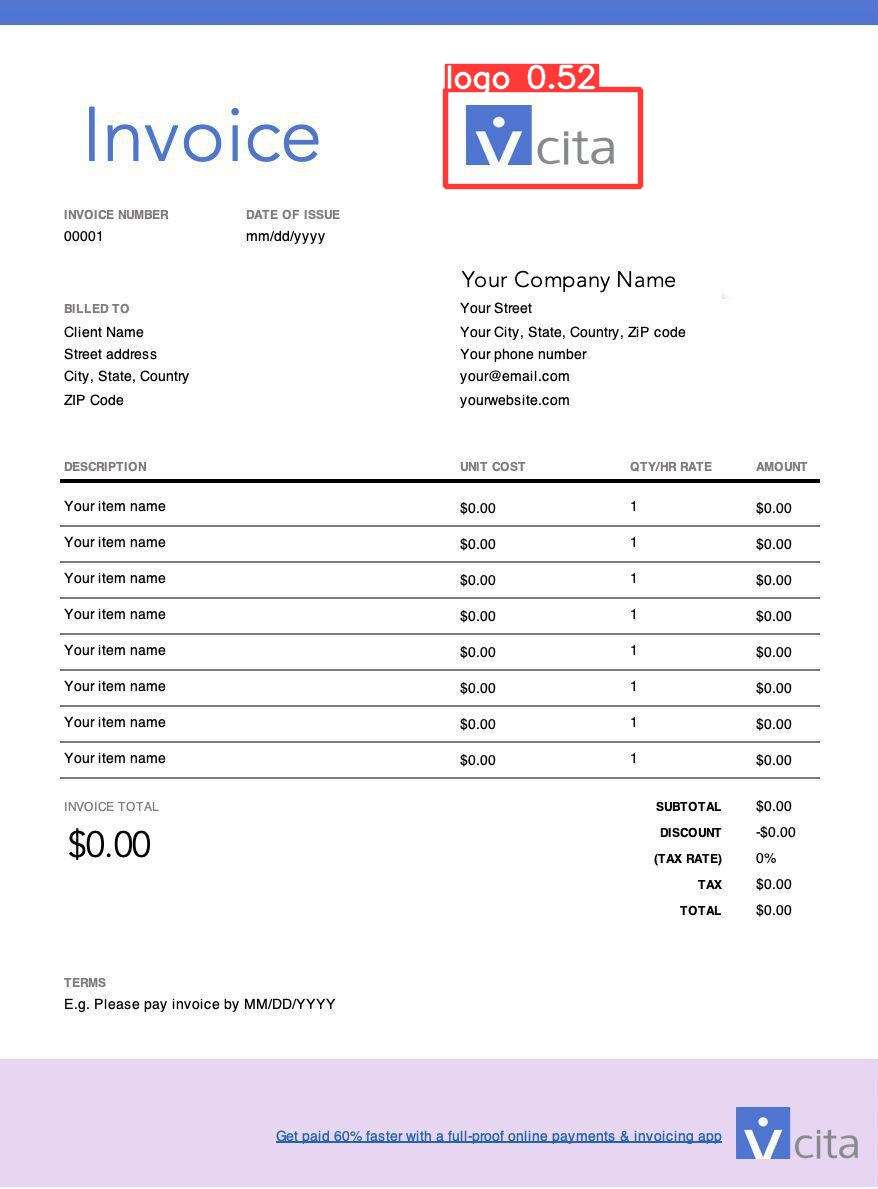

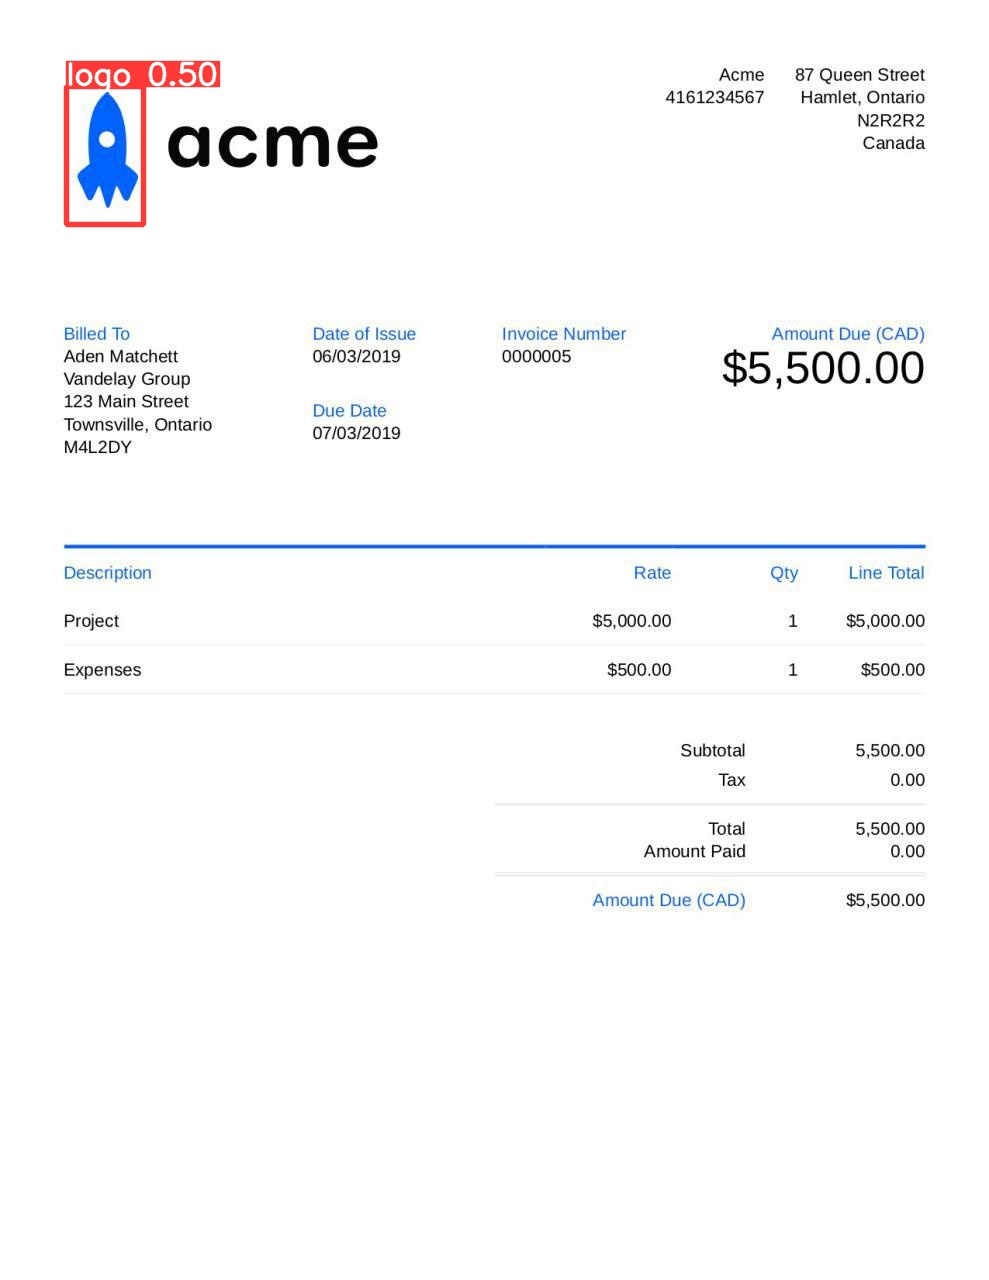

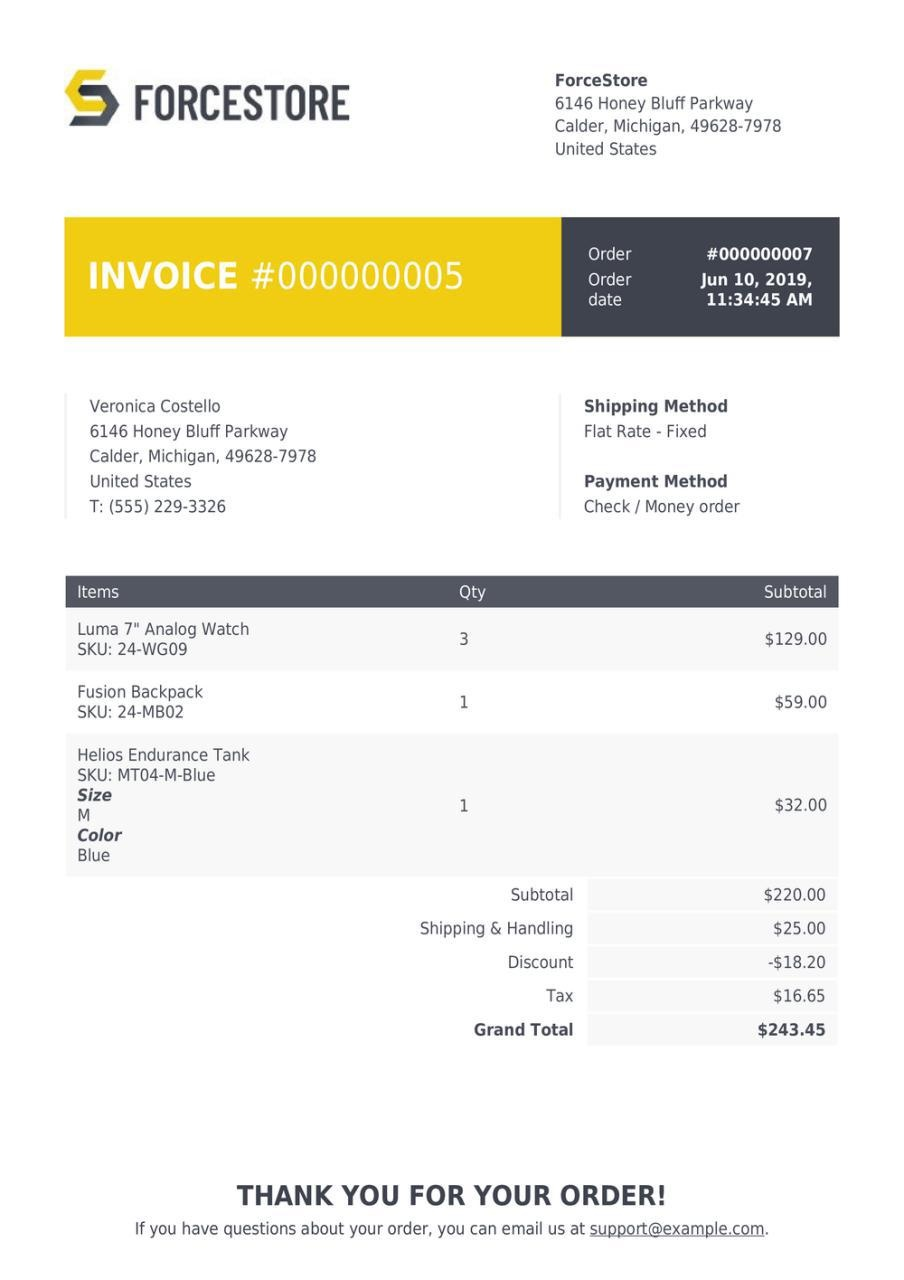

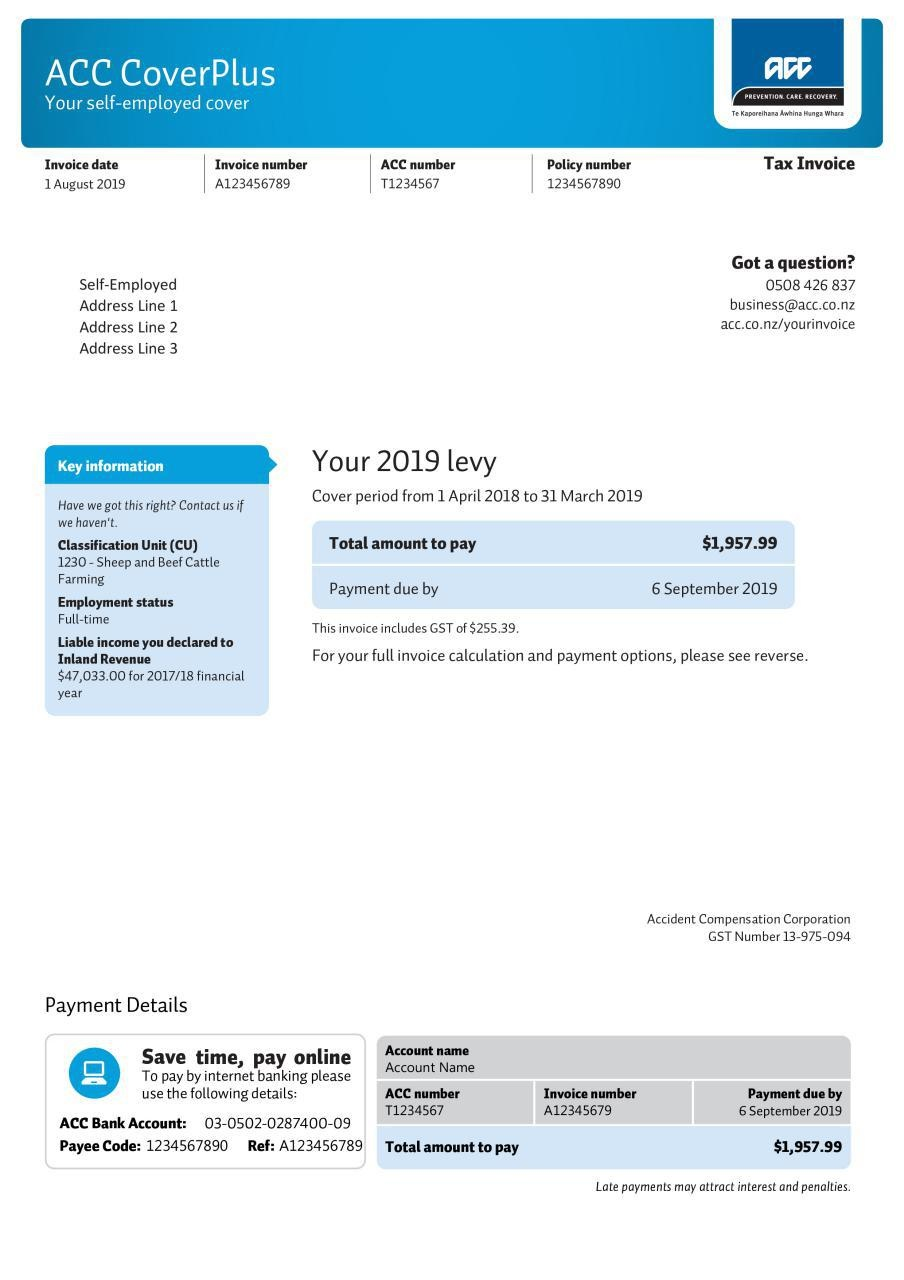

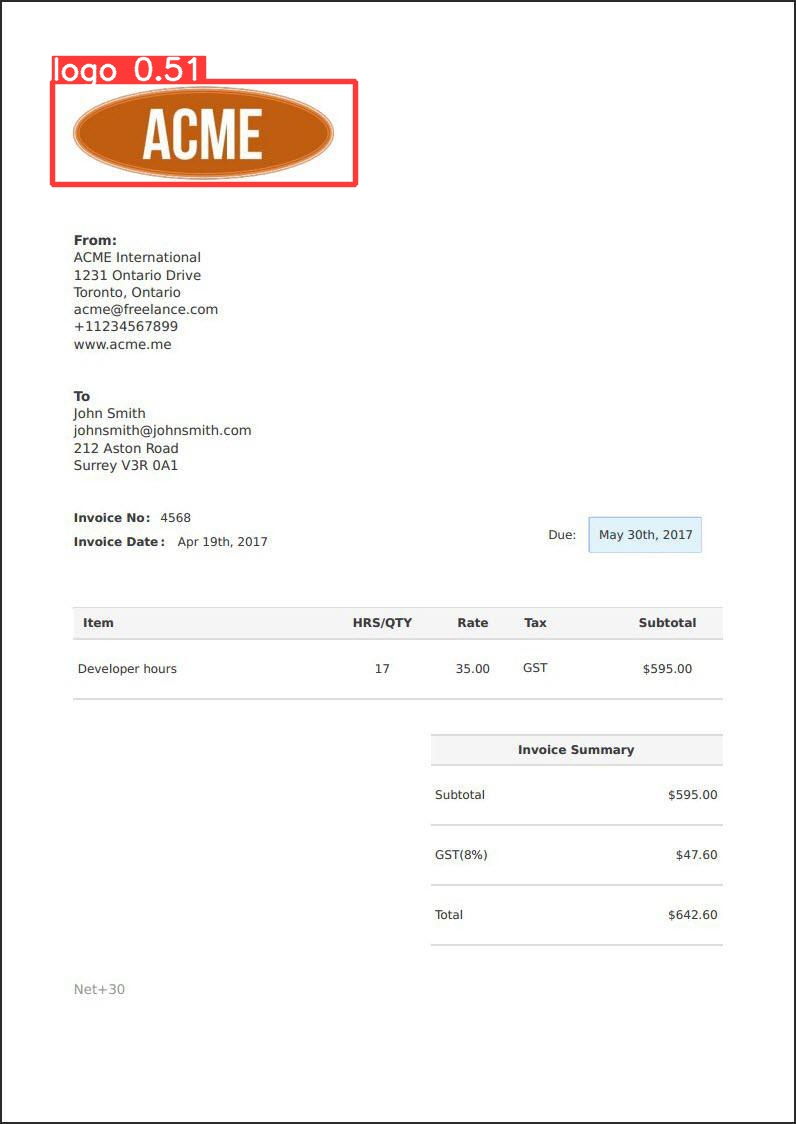

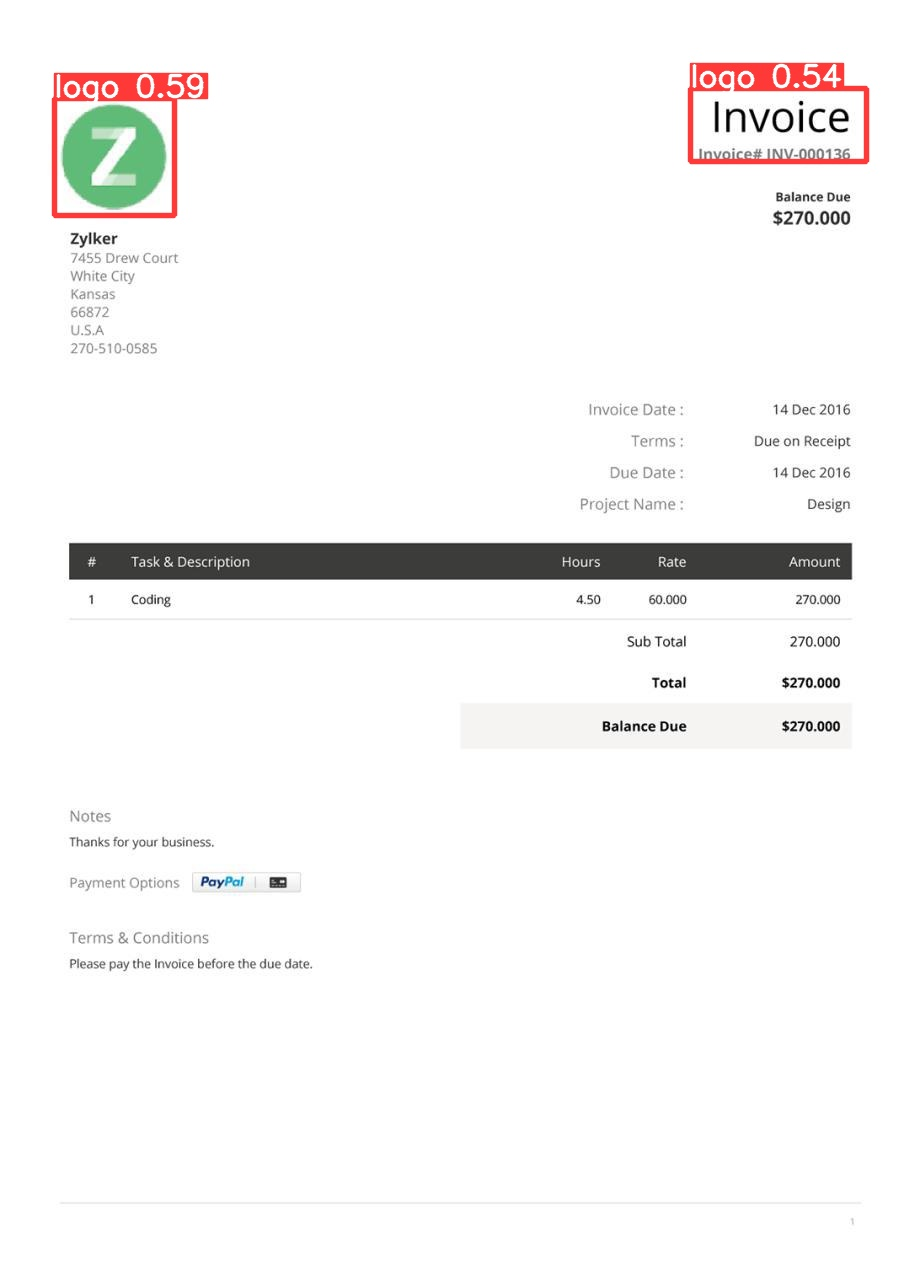

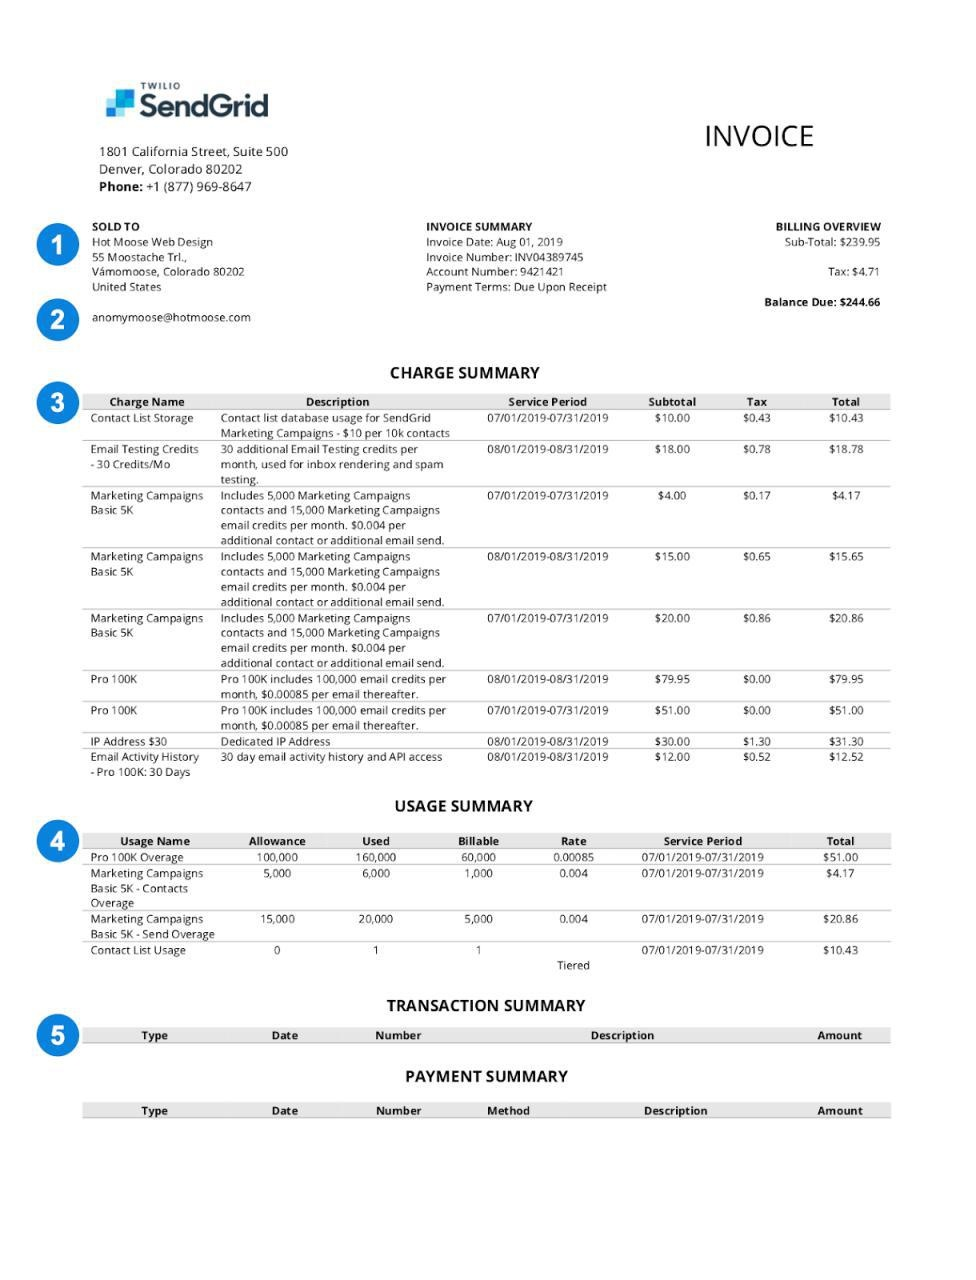

In [64]:
for image_path in glob.glob(f'{HOME}/runs/detect/predict12/*.jpg'):
      display(Image(filename=image_path, width=1000))
      print("\n")

## Обученная модель смогла верно определить логотипы на 3 из 7 документах. Еще на одном она верно определила логотип, но также определила лишний объект. На трех оставшихся логотип не задетектился вообще. Считаю что обучающая выборка могла быть хотя бы на 1000-10000 изображений (у меня чуть более 100, которые я нашел на Roboflow Universe). В реальном проекте этот недостаток я бы восполнял либо поиском более большого датасета либо ручной разметкой в CVAT.

In [65]:
import shutil

folder_path = "/content/runs/detect/train2"

# Permanent archive
shutil.make_archive("/content//train_archive_v2", 'zip', folder_path)

from google.colab import files
files.download("/content/train_archive_v2.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>